In [1]:
# Carregando as bibliotecas

import init


from analisys.bkt_analisys import *
from analisys.data_analisys import *
from analisys.graph_analisys import *
from analisys.optmizer_analisys import *

import time
import timeit
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, precision_recall_curve, auc, make_scorer, recall_score
from sklearn.cluster import KMeans
import statsmodels.api as sm
import pandas as pd
import numpy as np


# Para remover os warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import os
os.listdir()

['symbols_smll.csv',
 'mql5',
 'symbols_fx.csv',
 'workspace.code-workspace',
 '9730.csv',
 'deploy.py',
 'deae.csv',
 'strategies',
 '33ab.csv',
 'fourteenbis_livefx.py',
 'symbols_ibovcnc.csv',
 'e20a.csv',
 'symbols_nyse.csv',
 'fourteenbis_live.py',
 'symbols_usaiss.csv',
 'symbols_crypt.csv',
 'symbols_ibovcc.csv',
 'symbols_commodity.csv',
 'contability_20211122_b4ec.json',
 'contability_20211129_1bc9.json',
 'symbols_ibovf copy.csv',
 'run_14bis.py',
 'SANB11xSULA11_98d85201.json',
 'may30.xls',
 'best_bkt',
 'symbols_ibrx50.csv',
 '__pycache__',
 'SANB11xSULA11_f2d3bc64.json',
 'contability_20211129_39ef.json',
 'SULA11xBBSE3_0fd82e63.json',
 'symbols_fiis.csv',
 'forest[(100, 250), (1, 5), (-5, 1), (-1, 0), (0, 1), (20, 100), (100, 300)]b8cb_l5502522profit3000305_2019-01-01x2020-12-31_Apollo_16_01_01.xls',
 '4714.csv',
 '.vscode',
 'strategy.py',
 'strategy_backup.py',
 'pares0706.txt',
 'forest[(100, 250), (1, 5), (-5, 1), (-1, 0), (0, 1), (20, 100), (100, 300)]33ab_l5502522r

In [2]:

def modificaParafloat32(coluna):
    coluna = coluna.astype(np.float32)
    
    return coluna

#------------------------------------------------

In [3]:
# Leitura Arquivo CSV

start_data = '2021.01.01' #tem que colocar um dia antes no start_date
end_data = '2021.02.15'   #tem que colocar um dia depois no end_date
timeframe = 60
symbol = 'AZUL4'
hist = mt5_singlehistoricaldata(symbol,timeframe,start_data, end_data, raw = True)



#df1 = pd.read_csv(r'MELI34Daily.csv', delimiter=',' , usecols=colunas , parse_dates=['<DATE>'] )

#df1['<OPEN>'] = modificaParafloat32(df1['<OPEN>'])
#df1['<HIGH>'] = modificaParafloat32(df1['<HIGH>'])
#df1['<LOW>'] = modificaParafloat32(df1['<LOW>'])
#df1['<CLOSE>'] = modificaParafloat32(df1['<CLOSE>'])

#df1.rename(columns={ '<DATE>': 'Data','<OPEN>': 'Abertura','<HIGH>': 'Maxima','<LOW>': 'Minima','<CLOSE>': 'Fechamento' },inplace=True)

#df1.sort_values(['Data'], ascending=1 , inplace=True)


Dar uma olhada aqui \/

In [4]:
df1 = pd.DataFrame(hist)
df1.index = df1['date']

df1


,date,open,low,high,close,tickvolume,realvolume
date,,,,,,,
2021.02.12 17:00,2021.02.12 17:00,42.71,42.56,42.94,42.86,1152.0,609100.0
2021.02.12 16:00,2021.02.12 16:00,42.62,42.51,42.91,42.73,743.0,315600.0
2021.02.12 15:00,2021.02.12 15:00,42.96,42.54,42.96,42.65,731.0,316800.0
2021.02.12 14:00,2021.02.12 14:00,43.05,42.87,43.16,42.99,964.0,356400.0
2021.02.12 13:00,2021.02.12 13:00,42.68,42.60,43.18,43.05,995.0,485600.0
...,...,...,...,...,...,...,...
2021.01.04 14:00,2021.01.04 14:00,37.61,37.27,37.75,37.71,2213.0,919000.0
2021.01.04 13:00,2021.01.04 13:00,37.98,37.53,37.98,37.61,2797.0,1111400.0
2021.01.04 12:00,2021.01.04 12:00,38.42,37.94,38.49,38.00,3091.0,1249600.0


In [5]:

df1.rename(columns={ 'open': 'Abertura','high': 'Maxima','low': 'Minima','close': 'Fechamento' },inplace=True)
df1['Data'] = df1.index
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 2021.02.12 17:00 to 2021.01.04 10:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        234 non-null    object 
 1   Abertura    234 non-null    float64
 2   Minima      234 non-null    float64
 3   Maxima      234 non-null    float64
 4   Fechamento  234 non-null    float64
 5   tickvolume  234 non-null    float64
 6   realvolume  234 non-null    float64
 7   Data        234 non-null    object 
dtypes: float64(6), object(2)
memory usage: 16.5+ KB


In [6]:
df1.tail()

,date,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume,Data
date,,,,,,,,
2021.01.04 14:00,2021.01.04 14:00,37.61,37.27,37.75,37.71,2213.0,919000.0,2021.01.04 14:00
2021.01.04 13:00,2021.01.04 13:00,37.98,37.53,37.98,37.61,2797.0,1111400.0,2021.01.04 13:00
2021.01.04 12:00,2021.01.04 12:00,38.42,37.94,38.49,38.00,3091.0,1249600.0,2021.01.04 12:00
2021.01.04 11:00,2021.01.04 11:00,39.10,38.20,39.28,38.40,2884.0,1238200.0,2021.01.04 11:00
2021.01.04 10:00,2021.01.04 10:00,40.00,38.95,40.17,39.11,3955.0,1897100.0,2021.01.04 10:00


### Passo 3 - Tratamento dos dados

In [7]:
# Ajustando a data - precisamos transforma-la nos indices do data frame

#df1["Data"] = pd.to_datetime(df1["Data"]).dt.normalize()

df1 = df1.set_index("Data")

In [8]:
df1.head()

,date,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume
Data,,,,,,,
2021.02.12 17:00,2021.02.12 17:00,42.71,42.56,42.94,42.86,1152.0,609100.0
2021.02.12 16:00,2021.02.12 16:00,42.62,42.51,42.91,42.73,743.0,315600.0
2021.02.12 15:00,2021.02.12 15:00,42.96,42.54,42.96,42.65,731.0,316800.0
2021.02.12 14:00,2021.02.12 14:00,43.05,42.87,43.16,42.99,964.0,356400.0
2021.02.12 13:00,2021.02.12 13:00,42.68,42.60,43.18,43.05,995.0,485600.0


In [9]:
df1.describe()

,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume
count,234.000000,234.000000,234.000000,234.000000,234.000000,2.340000e+02
mean,39.701838,39.390256,40.014274,39.702009,2485.474359,9.921056e+05
std,2.738520,2.710148,2.760501,2.746140,1672.581757,7.634694e+05
min,36.010000,35.800000,36.050000,35.960000,1.000000,3.100000e+03
25%,37.422500,37.110000,37.665000,37.425000,1530.750000,5.443500e+05
50%,38.760000,38.325000,39.100000,38.760000,2125.000000,8.337500e+05
75%,42.392500,41.957500,42.705000,42.395000,2923.000000,1.204600e+06
max,44.840000,44.560000,44.850000,44.830000,15854.000000,7.059800e+06


In [10]:
# Construcao dos alvos - Expandir Testes Posteriormente de forma automatica com periodos mais longos

periodos = 1

# lag de X periodos
df1["Lag1"] = df1["Fechamento"].shift(-periodos)

# Alvo 1 - Retorno
df1["Retorno"] = df1["Fechamento"].pct_change(periodos)
df1["Alvo1"] = df1["Retorno"].shift(-periodos)

# Variaçao em Pontos do alvo
df1["Pontos"] = (df1["Fechamento"] - df1["Fechamento"].shift(1))
df1["Pontos"] = df1["Pontos"].shift(-periodos)

In [11]:
df1["Retorno"].describe()

count    233.000000
mean      -0.000314
std        0.012495
min       -0.089355
25%       -0.005156
50%        0.000000
75%        0.005584
max        0.044524
Name: Retorno, dtype: float64

No handles with labels found to put in legend.


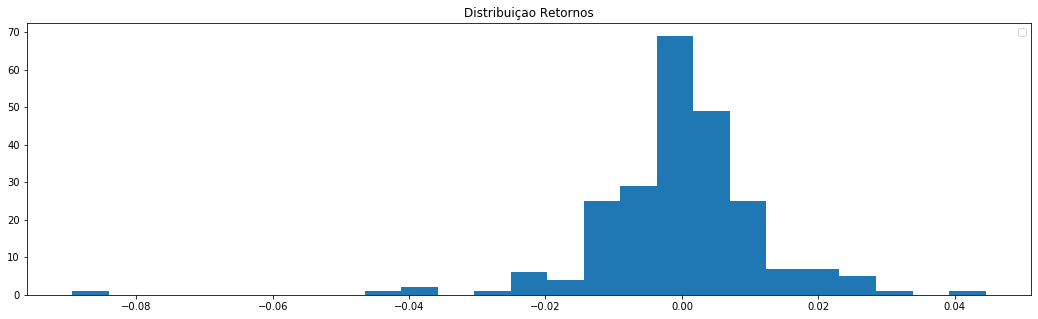

In [12]:
plt.figure(figsize = (18,5))
plt.hist(df1["Retorno"], bins = 25);

plt.legend()
plt.title("Distribuiçao Retornos");

In [13]:
# Criacao do alvo
df1["Alvo_Bin"] = np.where(df1['Alvo1'] > df1["Retorno"].describe()[6]/2 , 1
                           , np.where(df1['Alvo1'] < df1["Retorno"].describe()[4]/2, -1, 0))

In [14]:
'''
plt.figure(figsize = (18,5))
plt.hist(df1["Alvo_Bin"], bins = 5
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkgreen"
        , edgecolor = "none"
        , label = "Retornos");

#plt.legend()
#plt.title("Distribuiçao Retornos");
'''
print(df1)

#plt.plot(np.cumsum(df1['Pontos']))

                              date  Abertura  Minima  Maxima  Fechamento  \
Data                                                                       
2021.02.12 17:00  2021.02.12 17:00     42.71   42.56   42.94       42.86   
2021.02.12 16:00  2021.02.12 16:00     42.62   42.51   42.91       42.73   
2021.02.12 15:00  2021.02.12 15:00     42.96   42.54   42.96       42.65   
2021.02.12 14:00  2021.02.12 14:00     43.05   42.87   43.16       42.99   
2021.02.12 13:00  2021.02.12 13:00     42.68   42.60   43.18       43.05   
...                            ...       ...     ...     ...         ...   
2021.01.04 14:00  2021.01.04 14:00     37.61   37.27   37.75       37.71   
2021.01.04 13:00  2021.01.04 13:00     37.98   37.53   37.98       37.61   
2021.01.04 12:00  2021.01.04 12:00     38.42   37.94   38.49       38.00   
2021.01.04 11:00  2021.01.04 11:00     39.10   38.20   39.28       38.40   
2021.01.04 10:00  2021.01.04 10:00     40.00   38.95   40.17       39.11   

           

In [15]:
# Construçao das Variaveis

# Desvio Padrao de 5 dias
df1["std5"] = df1["Retorno"].rolling(5).std()

# Desvio Padrao de 10 dias
df1["std10"] = df1["Retorno"].rolling(10).std()

# Desvio Padrao de 15 dias
df1["std15"] = df1["Retorno"].rolling(15).std()

# Proporçao do corpo do candle em relacao ao range do dia
df1["prop"] = (df1["Fechamento"]-df1["Abertura"])/(df1["Maxima"]-df1["Minima"])

# Direçao do dia atual
df1["dir_D"] = np.where(df1['Fechamento'] > df1['Abertura'] , 1, 0)

# Direçao D-1
df1["dir_D-1"] = df1["dir_D"].shift(1)

# Direçao D-2
df1["dir_D-2"] = df1["dir_D"].shift(2)

# Direçao D-3
df1["dir_D-3"] = df1["dir_D"].shift(3)

# Media Movel de 15 dias std5
df1["mm_std5"] = df1["std5"].rolling(15).mean()

# Media Movel de 15 dias std5
df1["mm_std10"] = df1["std10"].rolling(15).mean()

# Media Movel de 15 dias std5
df1["mm_std15"] = df1["std15"].rolling(15).mean()

# RSL std5
df1["RSL_std5"] = (df1["std5"]/df1["std5"].rolling(15).mean())-1

# RSL std10
df1["RSL_std10"] = (df1["std10"]/df1["std10"].rolling(15).mean())-1

# RSL std15
df1["RSL_std15"] = (df1["std15"]/df1["std15"].rolling(15).mean())-1

# Aplicando a fisica

p = 5 

# Velocidade de p dias
df1["v"] = (df1["Retorno"] - df1["Retorno"].shift(p))/p

# Aceleraçao de p dias
df1["a"] = (df1["v"] - df1["v"].shift(p))/p

# Força
# Calculando a massa
df1["m"] = df1["Retorno"].rolling(p).sum()
df1["f"] = df1["m"]*df1["a"]

# Energia cinética
df1["T"] = 0.5*df1["m"]*df1["v"]*df1["v"]


# Trabalho 
# cateto_oposto
cat_op = df1["Retorno"].rolling(p).sum()-df1["Retorno"].rolling(1).sum()
cat_ad = p
df1["cat"] = cat_op/cat_ad
df1 = df1.dropna(axis = 0)
df1["w"] = df1["f"]*np.cos(np.arctan(df1["cat"]))

# Energia potencial
df1["k"] = cat_op*df1["m"]

# Torque
df1["tau"] = df1["f"]*np.sin(np.arctan(df1["cat"]))

# Momentum
df1["M"] = df1["m"]*df1["v"]

# Gravidade
df1["g"] = df1["m"]*df1["Retorno"].rolling(p).sum()/(df1["m"]/df1["Retorno"].rolling(p).sum())*(df1["m"]/df1["Retorno"].rolling(p).sum())

df1.head(10)

,date,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume,Lag1,Retorno,Alvo1,...,a,m,f,T,cat,w,k,tau,M,g
Data,,,,,,,,,,,,,,,,,,,,,
2021.02.09 12:00,2021.02.09 12:00,44.30,44.00,44.78,44.50,2397.0,958700.0,44.30,0.003156,-0.004494,...,0.000395,0.004527,1.787334e-06,5.280526e-12,0.000274,1.787334e-06,0.000006,4.899353e-10,-2.186444e-07,NaN
2021.02.09 11:00,2021.02.09 11:00,44.14,43.71,44.30,44.30,2801.0,877300.0,44.15,-0.004494,-0.003386,...,0.000169,0.000709,1.195934e-07,2.067289e-10,0.001041,1.195933e-07,0.000004,1.244673e-10,-5.415747e-07,NaN
2021.02.09 10:00,2021.02.09 10:00,44.30,43.83,44.58,44.15,2870.0,1207400.0,44.59,-0.003386,0.009966,...,-0.000145,-0.001999,2.900693e-07,-2.932518e-10,0.000277,2.900693e-07,-0.000003,8.046818e-11,1.082771e-06,NaN
2021.02.08 17:00,2021.02.08 17:00,44.84,44.56,44.84,44.59,1723.0,729200.0,44.83,0.009966,0.005382,...,0.000835,0.010454,8.730937e-06,3.241922e-08,0.000097,8.730937e-06,0.000005,8.512382e-10,2.603439e-05,NaN
2021.02.08 16:00,2021.02.08 16:00,44.35,44.33,44.84,44.83,1885.0,767300.0,44.37,0.005382,-0.010261,...,-0.000084,0.010624,-8.873903e-07,6.176758e-12,0.001048,-8.873898e-07,0.000056,-9.302746e-10,3.622759e-07,0.000113
2021.02.08 15:00,2021.02.08 15:00,44.43,44.18,44.63,44.37,2001.0,690400.0,44.42,-0.010261,0.001127,...,-0.000527,-0.002793,1.471950e-06,-1.005557e-08,0.001494,1.471949e-06,-0.000021,2.198506e-09,7.494659e-06,0.000008
2021.02.08 14:00,2021.02.08 14:00,44.02,44.00,44.69,44.42,1432.0,638900.0,44.00,0.001127,-0.009455,...,0.000378,0.002828,1.067789e-06,1.787407e-09,0.000340,1.067789e-06,0.000005,3.633487e-10,3.179721e-06,0.000008
2021.02.08 13:00,2021.02.08 13:00,44.09,43.93,44.24,44.00,969.0,352100.0,44.08,-0.009455,0.001818,...,-0.000134,-0.003241,4.356875e-07,-2.387581e-09,0.001243,4.356871e-07,-0.000020,5.414980e-10,3.933933e-06,0.000011
2021.02.08 12:00,2021.02.08 12:00,44.24,43.92,44.39,44.08,1503.0,741100.0,44.21,0.001818,0.002949,...,-0.000824,-0.011389,9.384464e-06,-1.512137e-08,-0.002641,9.384432e-06,0.000150,-2.478790e-08,1.855874e-05,0.000130


In [16]:
# Filtrando os valores missing

df1_filtrado = df1.dropna(axis = 0) 

df1_filtrado= df1_filtrado.drop(["std5","std10","std15","mm_std5","mm_std10","mm_std15"], axis = 1)

In [17]:
corte = 10

df1_filtrado["RSL_std5"] = pd.qcut(df1_filtrado["RSL_std5"], corte, labels = False)
df1_filtrado["RSL_std10"] = pd.qcut(df1_filtrado["RSL_std10"], corte, labels = False)
df1_filtrado["RSL_std15"] = pd.qcut(df1_filtrado["RSL_std15"], corte, labels = False)
df1_filtrado["v"] = pd.qcut(df1_filtrado["v"], corte, labels = False)
df1_filtrado["a"] = pd.qcut(df1_filtrado["a"], corte, labels = False)
df1_filtrado["m"] = pd.qcut(df1_filtrado["m"], corte, labels = False)
df1_filtrado["f"] = pd.qcut(df1_filtrado["f"], corte, labels = False)
df1_filtrado["T"] = pd.qcut(df1_filtrado["T"], corte, labels = False)
df1_filtrado["w"] = pd.qcut(df1_filtrado["w"], corte, labels = False)
df1_filtrado["k"] = pd.qcut(df1_filtrado["k"], corte, labels = False)
df1_filtrado["tau"] = pd.qcut(df1_filtrado["tau"], corte, labels = False)
df1_filtrado["M"] = pd.qcut(df1_filtrado["M"], corte, labels = False)
df1_filtrado["g"] = pd.qcut(df1_filtrado["g"], corte, labels = False)

In [18]:
pd.crosstab(pd.qcut(df1["RSL_std5"], corte, labels = False), df1["Alvo_Bin"])/df1.shape[0]*100

Alvo_Bin,-1,0,1
RSL_std5,,,
0,4.455446,0.990099,4.950495
1,2.475248,1.485149,5.940594
2,3.960396,3.465347,2.475248
3,3.960396,1.980198,3.960396
4,3.960396,3.465347,2.475248
5,3.960396,1.485149,4.455446
6,3.960396,2.475248,3.465347
7,3.465347,4.455446,1.980198
8,3.465347,3.465347,2.970297


In [19]:
pd.crosstab(pd.qcut(df1["RSL_std5"], 5, labels = False), df1["Alvo_Bin"])/df1.shape[0]*100

Alvo_Bin,-1,0,1
RSL_std5,,,
0,6.930693,2.475248,10.891089
1,7.920792,5.445545,6.435644
2,7.920792,4.950495,6.930693
3,7.425743,6.930693,5.445545
4,6.435644,7.920792,5.940594


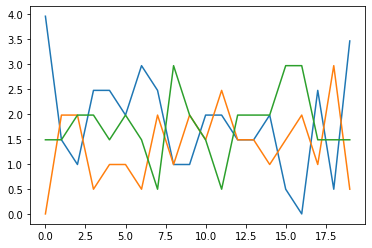

In [20]:
plt.plot(pd.crosstab(pd.qcut(df1["RSL_std10"], 20, labels = False), df1["Alvo_Bin"])/df1.shape[0]*100);

In [21]:
df1_filtrado.tail()

,date,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume,Lag1,Retorno,Alvo1,...,a,m,f,T,cat,w,k,tau,M,g
Data,,,,,,,,,,,,,,,,,,,,,
2021.01.04 15:00,2021.01.04 15:00,37.69,37.68,38.07,37.79,1920.0,680900.0,37.71,0.004519,-0.002117,...,5,7,3,5,0.002017,3,4,4,4,0
2021.01.04 14:00,2021.01.04 14:00,37.61,37.27,37.75,37.71,2213.0,919000.0,37.61,-0.002117,-0.002652,...,8,8,9,8,0.005766,9,8,9,8,0
2021.01.04 13:00,2021.01.04 13:00,37.98,37.53,37.98,37.61,2797.0,1111400.0,38.00,-0.002652,0.010370,...,0,4,6,1,-0.000103,6,1,4,6,1
2021.01.04 12:00,2021.01.04 12:00,38.42,37.94,38.49,38.00,3091.0,1249600.0,38.40,0.010370,0.010526,...,3,6,3,7,-0.000633,3,0,6,5,2
2021.01.04 11:00,2021.01.04 11:00,39.10,38.20,39.28,38.40,2884.0,1238200.0,39.11,0.010526,0.018490,...,5,8,6,8,0.002024,6,5,7,8,6


In [22]:
df1_filtrado.columns

Index(['date', 'Abertura', 'Minima', 'Maxima', 'Fechamento', 'tickvolume',
       'realvolume', 'Lag1', 'Retorno', 'Alvo1', 'Pontos', 'Alvo_Bin', 'prop',
       'dir_D', 'dir_D-1', 'dir_D-2', 'dir_D-3', 'RSL_std5', 'RSL_std10',
       'RSL_std15', 'v', 'a', 'm', 'f', 'T', 'cat', 'w', 'k', 'tau', 'M', 'g'],
      dtype='object')

In [23]:
df1_filtrado = df1_filtrado.drop(["m","cat","M"], axis=1)

In [24]:
# Separando os dados entre treinamento e teste
print(df1_filtrado)

# trinamento
start_train = "2021.01.04"
end_train = "2021.02.07"

# teste
start_test = "2021.02.08"
end_test = "2021.02.14"

df1_train1 = df1_filtrado.loc[start_train : end_train]
df1_test1 = df1_filtrado.loc[start_test : end_test]


from sklearn.model_selection import train_test_split

df1_train1, df1_test1 = train_test_split(df1_filtrado, test_size=0.2)

                              date  Abertura  Minima  Maxima  Fechamento  \
Data                                                                       
2021.02.08 16:00  2021.02.08 16:00     44.35   44.33   44.84       44.83   
2021.02.08 15:00  2021.02.08 15:00     44.43   44.18   44.63       44.37   
2021.02.08 14:00  2021.02.08 14:00     44.02   44.00   44.69       44.42   
2021.02.08 13:00  2021.02.08 13:00     44.09   43.93   44.24       44.00   
2021.02.08 12:00  2021.02.08 12:00     44.24   43.92   44.39       44.08   
...                            ...       ...     ...     ...         ...   
2021.01.04 15:00  2021.01.04 15:00     37.69   37.68   38.07       37.79   
2021.01.04 14:00  2021.01.04 14:00     37.61   37.27   37.75       37.71   
2021.01.04 13:00  2021.01.04 13:00     37.98   37.53   37.98       37.61   
2021.01.04 12:00  2021.01.04 12:00     38.42   37.94   38.49       38.00   
2021.01.04 11:00  2021.01.04 11:00     39.10   38.20   39.28       38.40   

           

In [25]:
df1_train1.head()

,date,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume,Lag1,Retorno,Alvo1,...,RSL_std10,RSL_std15,v,a,f,T,w,k,tau,g
Data,,,,,,,,,,,,,,,,,,,,,
2021.02.03 10:00,2021.02.03 10:00,42.51,41.90,42.86,42.15,2653.0,846400.0,42.14,-0.007067,-0.000237,...,5,5,5,7,5,5,5,2,6,1
2021.01.15 13:00,2021.01.15 13:00,37.43,37.32,37.77,37.52,1428.0,594600.0,37.44,-0.002128,-0.002132,...,9,7,5,5,1,4,1,9,8,9
2021.01.05 12:00,2021.01.05 12:00,37.29,36.95,37.48,37.12,1568.0,532500.0,37.26,-0.010133,0.003772,...,7,6,0,0,9,0,9,7,0,7
2021.02.02 15:00,2021.02.02 15:00,41.90,41.82,42.15,41.93,1604.0,438300.0,41.92,-0.011085,-0.000238,...,4,5,1,1,5,3,5,0,6,0
2021.01.18 13:00,2021.01.18 13:00,39.19,38.56,39.19,38.79,1737.0,1082400.0,39.18,0.001291,0.010054,...,1,2,3,4,2,7,2,6,3,5


In [26]:
df1_test1.head()

,date,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume,Lag1,Retorno,Alvo1,...,RSL_std10,RSL_std15,v,a,f,T,w,k,tau,g
Data,,,,,,,,,,,,,,,,,,,,,
2021.01.29 17:00,2021.01.29 17:00,39.94,39.90,40.35,40.34,2628.0,1325200.0,39.94,-0.012485,-0.009916,...,5,5,1,3,6,1,6,6,2,7
2021.01.29 12:00,2021.01.29 12:00,40.89,40.15,40.90,40.84,2332.0,914000.0,40.87,0.006407,0.000735,...,7,8,8,8,8,8,8,3,7,4
2021.02.05 17:00,2021.02.05 17:00,43.18,43.17,43.56,43.55,1474.0,510100.0,43.17,-0.012472,-0.008726,...,8,4,1,1,8,1,8,4,2,6
2021.02.08 15:00,2021.02.08 15:00,44.43,44.18,44.63,44.37,2001.0,690400.0,44.42,-0.010261,0.001127,...,3,1,1,2,5,3,5,0,6,1
2021.01.29 11:00,2021.01.29 11:00,41.91,40.12,42.10,40.87,5030.0,1965100.0,41.92,0.000735,0.025691,...,6,7,7,7,8,8,8,7,8,7


In [27]:
df1_filtrado.columns

Index(['date', 'Abertura', 'Minima', 'Maxima', 'Fechamento', 'tickvolume',
       'realvolume', 'Lag1', 'Retorno', 'Alvo1', 'Pontos', 'Alvo_Bin', 'prop',
       'dir_D', 'dir_D-1', 'dir_D-2', 'dir_D-3', 'RSL_std5', 'RSL_std10',
       'RSL_std15', 'v', 'a', 'f', 'T', 'w', 'k', 'tau', 'g'],
      dtype='object')

In [28]:
# Separando os dados com as variaveis em x e o alvo em y
 
x_train1 = df1_train1.iloc[:, 9:24]
print(x_train1)
y_train1 = df1_train1['Alvo_Bin'].values.reshape(-1, 1)

x_test1 = df1_test1.iloc[:, 9:24]
y_test1 = df1_test1['Alvo_Bin'].values.reshape(-1, 1)

                     Alvo1  Pontos  Alvo_Bin      prop  dir_D  dir_D-1  \
Data                                                                     
2021.02.03 10:00 -0.000237   -0.01         0 -0.375000      0      1.0   
2021.01.15 13:00 -0.002132   -0.08         0  0.200000      1      1.0   
2021.01.05 12:00  0.003772    0.14         1 -0.320755      0      1.0   
2021.02.02 15:00 -0.000238   -0.01         0  0.090909      1      1.0   
2021.01.18 13:00  0.010054    0.39         1 -0.634921      0      0.0   
...                    ...     ...       ...       ...    ...      ...   
2021.01.14 10:00 -0.027845   -1.03        -1  0.565657      1      1.0   
2021.01.19 11:00  0.005544    0.21         1 -0.321429      0      0.0   
2021.02.04 14:00 -0.008486   -0.37        -1  0.541667      1      1.0   
2021.01.26 14:00  0.003593    0.14         1 -0.333333      0      0.0   
2021.01.11 11:00 -0.001902   -0.07         0  0.132075      1      0.0   

                  dir_D-2  dir_D-3  R

In [29]:
min_clusters = 2
max_clusters = 35
inertias = np.zeros(shape = (max_clusters - min_clusters + 1,))

In [30]:
inicio = timeit.default_timer()

for i in range(min_clusters, max_clusters + 1):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(x_train1)
    inertias[i - min_clusters] = km.inertia_
    

fim = timeit.default_timer()
print ('duracao: %f' % (fim - inicio))


duracao: 1.383108


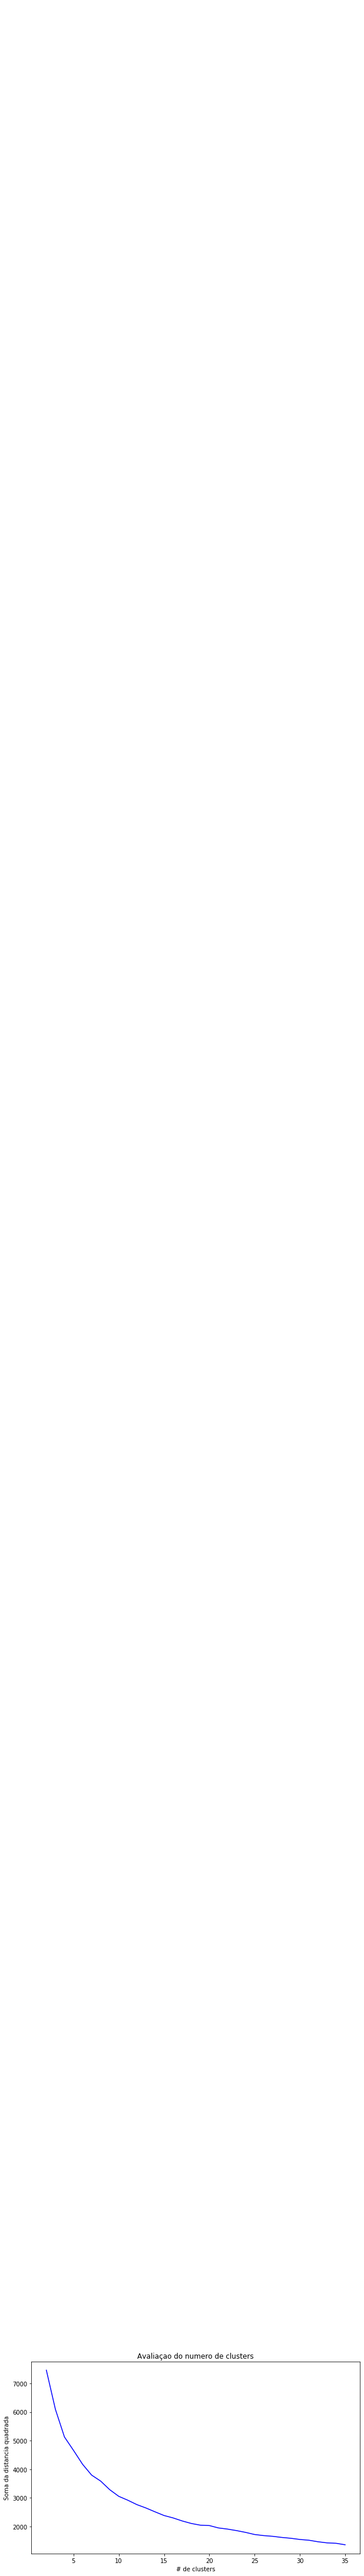

In [31]:
plt.figure(figsize = (10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertias, color = "b")
plt.title("Avaliaçao do numero de clusters")
plt.xlabel("# de clusters")
plt.ylabel("Soma da distancia quadrada")
plt.annotate("# de clusters escolhido", xy = (6, 68000), xytext = (7, 90000),
            arrowprops = dict(facecolor = "red", shrink = 0.05),
            );

In [32]:
inicio = timeit.default_timer()

kmodel = KMeans(n_clusters = 6, random_state = 42)
clusters = kmodel.fit(x_train1)
    

fim = timeit.default_timer()
print ('duracao: %f' % (fim - inicio))


duracao: 0.028561


In [33]:
# Acessando os clusters

clusters.labels_

array([2, 2, 1, 1, 3, 0, 1, 2, 1, 5, 2, 4, 0, 4, 5, 3, 3, 2, 1, 4, 3, 3,
       3, 0, 0, 4, 2, 2, 3, 4, 3, 2, 4, 0, 2, 3, 5, 5, 5, 4, 5, 3, 2, 3,
       0, 0, 3, 1, 4, 5, 4, 0, 0, 5, 5, 2, 0, 2, 2, 3, 0, 3, 0, 1, 2, 0,
       1, 2, 5, 1, 3, 2, 4, 2, 0, 0, 5, 4, 2, 3, 1, 3, 4, 0, 5, 0, 1, 1,
       3, 3, 3, 4, 0, 5, 3, 3, 5, 2, 2, 3, 0, 2, 2, 0, 0, 4, 4, 3, 0, 0,
       0, 4, 0, 2, 4, 0, 4, 3, 2, 1, 4, 3, 5, 4, 0, 3, 0, 2, 1, 5, 5, 1,
       4, 5, 2, 1, 3, 5, 2, 1, 0, 1, 1, 3, 5, 5, 5, 4, 2, 3, 0, 0, 1, 1,
       5, 3, 5, 0], dtype=int32)

In [34]:
# Aplicando os clusters na base de treinamento e na base de teste
# Atribuido-os à base de treinamento e teste

train_clusters = pd.DataFrame(clusters.labels_,columns = ["Cluster"])
train_clusters["Label"] = y_train1
train_clusters["Alvo1"] = df1_train1['Alvo1'].values.reshape(-1, 1)


fitted_clusters = kmodel.predict(x_test1)
test_clusters = pd.DataFrame(fitted_clusters,columns = ["Cluster"])
test_clusters["Label"] = y_test1
test_clusters["Alvo1"] = df1_test1['Alvo1'].values.reshape(-1, 1)

In [35]:
train_clusters.head()

,Cluster,Label,Alvo1
0,2,0,-0.000237
1,2,0,-0.002132
2,1,1,0.003772
3,1,0,-0.000238
4,3,1,0.010054


In [36]:
test_clusters.head()

,Cluster,Label,Alvo1
0,1,-1,-0.009916
1,5,0,0.000735
2,1,-1,-0.008726
3,4,0,0.001127
4,5,1,0.025691


In [37]:
pd.crosstab(train_clusters["Cluster"], train_clusters["Label"])

Label,-1,0,1
Cluster,,,
0,13,3,16
1,6,7,8
2,7,14,7
3,10,11,10
4,13,6,3
5,6,5,13


In [38]:
train_clusters.groupby("Cluster")["Alvo1"].mean()

Cluster
0    0.001344
1    0.000257
2   -0.000326
3    0.000408
4   -0.004993
5    0.000559
Name: Alvo1, dtype: float64

In [39]:
train_clusters.groupby("Cluster")["Alvo1"].sum()

Cluster
0    0.043003
1    0.005406
2   -0.009129
3    0.012652
4   -0.109850
5    0.013408
Name: Alvo1, dtype: float64

In [40]:
#Cluster
#0    0.540672  Compra
#1   -0.295283   Venda
#2   -0.760853  Venda
#3    0.364127 Compra
#4    0.394126 Compra
#5    0.085374 Não Vale a Pena...

###  Avaliaçao dos Resultados

In [41]:
# Calculando a performance - para toda a base

y_pred_all = kmodel.predict(df1_filtrado.iloc[:, 9:24])
df1_filtrado.loc[: , "Clusters"] = y_pred_all

In [42]:
df1_filtrado.loc[: , "Previsto"] = np.where(((df1_filtrado.loc[: , "Clusters"] == 0) | 
                                             (df1_filtrado.loc[: , "Clusters"] == 4) | 
                                             (df1_filtrado.loc[: , "Clusters"] == 3)), 1,
                                   np.where(((df1_filtrado.loc[: , "Clusters"] == 1) | 
                                            (df1_filtrado.loc[: , "Clusters"] == 2)) ,-1 ,0))

In [43]:
df1_filtrado.loc[: , "Retorno_Modelo"] = df1_filtrado.loc[: , "Previsto"]*df1_filtrado["Alvo1"]

In [44]:
df1_filtrado.loc[: , "Retorno_Modelo_Acumulado"] = df1_filtrado["Retorno_Modelo"].cumsum()

In [45]:
df1_filtrado.loc[: , "Retorno_Modelo_Acumulado"].tail()

Data
2021.01.04 15:00   -0.029360
2021.01.04 14:00   -0.029360
2021.01.04 13:00   -0.039729
2021.01.04 12:00   -0.029203
2021.01.04 11:00   -0.029203
Name: Retorno_Modelo_Acumulado, dtype: float64

In [46]:
# Faz uma copia de df1_filtrado
df_stats = df1_filtrado.copy()

In [47]:
# Para fazer um conditional plot

df1_filtrado.index.name = "Date"
df1_filtrado.reset_index(inplace = True)

df1_filtrado["Date"] = pd.to_datetime(df1_filtrado["Date"])

df1_filtrado["train_test"] = np.where(df1_filtrado["Date"] > end_train, 1, -1)

In [48]:
base_agregada = df1_filtrado.resample("M", on = "Date").sum()

base_agregada.loc[: , "Retorno_Modelo_Acumulado"] = base_agregada["Retorno_Modelo"].cumsum()*100

""


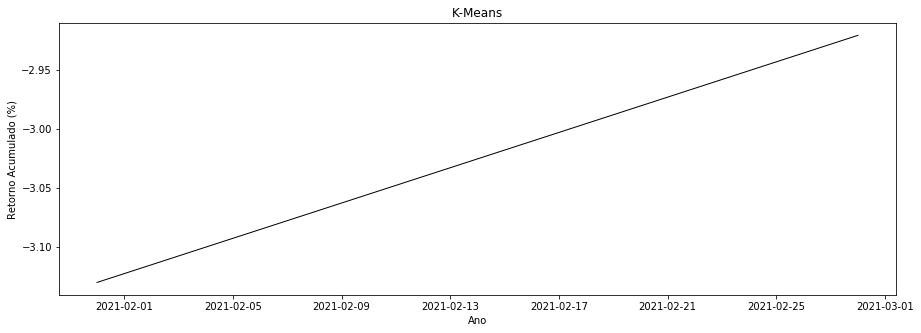

In [49]:
# Plota o grafico
fig, ax = plt.subplots(figsize = (15,5))

def grafico(group):
    color = "black" if (group["train_test"] < 0).all() else "blue"
    ax.plot(group.index, group.Retorno_Modelo_Acumulado, c=color, linewidth=1)
    plt.xlabel("Ano")
    plt.ylabel("Retorno Acumulado (%)")
    plt.title("K-Means")
    #plt.axvline( x = end_train, color='purple', linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text("2009-08-01", 90, "Treinamento: 2005-2012", **setup)
    #plt.text("2017-01-01", 80, "Teste: 2013-2020", **setup)
    #plt.text("2010-01-01", 86.5, "Retorno total: +120%", **setup2)
    ##plt.text("2017-03-01", 85.5, "www.outspokenmarket.com", **setup2)

base_agregada.groupby((base_agregada["train_test"].shift() * base_agregada["train_test"] < 0).cumsum()).apply(grafico)


In [50]:
df1_filtrado.head(2)

,Date,date,Abertura,Minima,Maxima,Fechamento,tickvolume,realvolume,Lag1,Retorno,...,T,w,k,tau,g,Clusters,Previsto,Retorno_Modelo,Retorno_Modelo_Acumulado,train_test
0,2021-02-08 16:00:00,2021.02.08 16:00,44.35,44.33,44.84,44.83,1885.0,767300.0,44.37,0.005382,...,5,3,2,4,3,0,1,-0.010261,-0.010261,1
1,2021-02-08 15:00:00,2021.02.08 15:00,44.43,44.18,44.63,44.37,2001.0,690400.0,44.42,-0.010261,...,3,5,0,6,1,4,1,0.001127,-0.009134,1


In [51]:
df1_filtrado[df1_filtrado['Date'] >= '2017-01-01'][['Date','Retorno_Modelo_Acumulado']]

,Date,Retorno_Modelo_Acumulado
0,2021-02-08 16:00:00,-0.010261
1,2021-02-08 15:00:00,-0.009134
2,2021-02-08 14:00:00,-0.018589
3,2021-02-08 13:00:00,-0.016771
4,2021-02-08 12:00:00,-0.019720
...,...,...
193,2021-01-04 15:00:00,-0.029360
194,2021-01-04 14:00:00,-0.029360
195,2021-01-04 13:00:00,-0.039729
196,2021-01-04 12:00:00,-0.029203


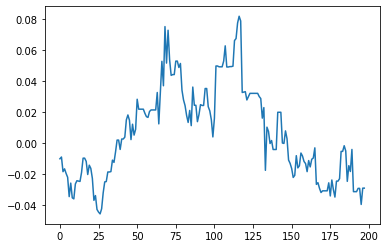

In [52]:
# 2017-01-02	2.355062
#
#2021-07-12	3.526126
#
#   2.355062 - 3.526126 = -1,171064 

# -1,171064 * 100 = 117% 

# 2017,18,19,20,21 ?/// 117 / 5  = 23% aa em média 
plt.plot(np.cumsum(df1_filtrado['Retorno_Modelo_Acumulado']))


In [53]:
# ESTATISTICA BEM BASICA DA QUANT DE TRADES FEITOS 
#0    0.540672  Compra
#1   -0.295283   Venda
#2   -0.760853  Venda
#3    0.364127 Compra
#4    0.394126 Compra
#5    0.085374 Não Vale a Pena...


import collections

collections.Counter(y_pred_all)

np.count_nonzero((y_pred_all == 0) | (y_pred_all == 3) | (y_pred_all == 2) | (y_pred_all == 1) | (y_pred_all == 4))

len(y_pred_all)

long = np.count_nonzero((y_pred_all == 0) | (y_pred_all == 3)| (y_pred_all == 4))
short = np.count_nonzerolong = np.count_nonzero((y_pred_all == 1) | (y_pred_all == 2))

trades = np.count_nonzero((y_pred_all == 0) | (y_pred_all == 3) | (y_pred_all == 2) | (y_pred_all == 1) | (y_pred_all == 4))
total = len(y_pred_all)

print("K-Means")
print("--------------------------")
print("# Pregoes:       ", total)
print("# Trades:        ", trades)
print("--------------------------")
print("Tempo em trades: ", round(trades/total*100,2),"%")
print("Tempo em Long:   ", round(long/total*100,2),"%")
print("Tempo em Short:  ", round(short/total*100,2),"%")
print("--------------------------")
print("Trades em Long:  ", round(long/trades*100,2),"%")
print("Trades em Short: ", round(short/trades*100,2),"%")


K-Means
--------------------------
# Pregoes:        198
# Trades:         164
--------------------------
Tempo em trades:  82.83 %
Tempo em Long:    51.01 %
Tempo em Short:   31.82 %
--------------------------
Trades em Long:   61.59 %
Trades em Short:  38.41 %
